<a href="https://colab.research.google.com/github/m4arce/TelecomX_Challenge2/blob/main/TelecomX_Churn_Prediccion_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Telecom X – Predicción de Cancelación de Clientes (Churn)

Este notebook forma parte de la segunda etapa del desafío **Telecom X**, centrado en la predicción de cancelación de clientes mediante técnicas de machine learning. Se trabajará con el dataset `datos_tratados.csv` generado en la parte 1.

**Objetivos:**
- Preparar los datos para modelado
- Aplicar análisis exploratorio con foco en correlación
- Entrenar y evaluar modelos
- Generar conclusiones estratégicas


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


## 📥 Carga del dataset tratado

In [10]:
df = pd.read_csv("/content/datos_tratados (1).csv")
df.head()


,customerID,Churn,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,...,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,DSL,No,Yes,No,Yes,Yes,No,Yes,...,One year,Yes,Mailed check,65.6,593.30,Female,0,Yes,Yes,9
1,0003-MKNFE,No,DSL,No,No,No,No,No,Yes,Yes,...,Month-to-month,No,Mailed check,59.9,542.40,Male,0,No,No,9
2,0004-TLHLJ,Yes,Fiber optic,No,No,Yes,No,No,No,Yes,...,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,No,4
3,0011-IGKFF,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,...,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,No,13
4,0013-EXCHZ,Yes,Fiber optic,No,No,No,Yes,Yes,No,Yes,...,Month-to-month,Yes,Mailed check,83.9,267.40,Female,1,Yes,No,3


## 🧹 Limpieza y eliminación de columnas irrelevantes

In [11]:
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)


## 📊 Análisis de proporción de clases

Proporción de cancelaciones:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


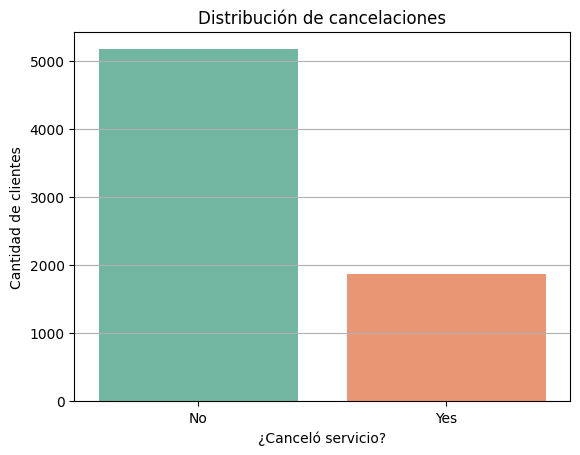

In [20]:
churn_counts = df['Churn'].value_counts(normalize=True)
print("Proporción de cancelaciones:")
print(churn_counts)

# Gráfico mejorado
colors = ['#66c2a5', '#fc8d62']
sns.countplot(data=df, x='Churn', palette=colors)
plt.title("Distribución de cancelaciones")
plt.ylabel("Cantidad de clientes")
plt.xlabel("¿Canceló servicio?")
plt.grid(axis='y')
plt.show()


## 🔤 Codificación de variables categóricas

In [13]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Charges.Monthly,Charges.Total,SeniorCitizen,tenure,Churn_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,MultipleLines_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,Partner_Yes,Dependents_Yes
0,65.6,593.30,0,9,False,False,False,False,False,False,...,False,True,False,True,False,False,True,False,True,True
1,59.9,542.40,0,9,False,False,False,False,False,False,...,True,False,False,False,False,False,True,True,False,False
2,73.9,280.85,0,4,True,True,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
3,98.0,1237.85,1,13,True,True,False,False,False,False,...,False,False,False,True,False,True,False,True,True,False
4,83.9,267.40,1,3,True,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False


## 🔍 Análisis de correlación

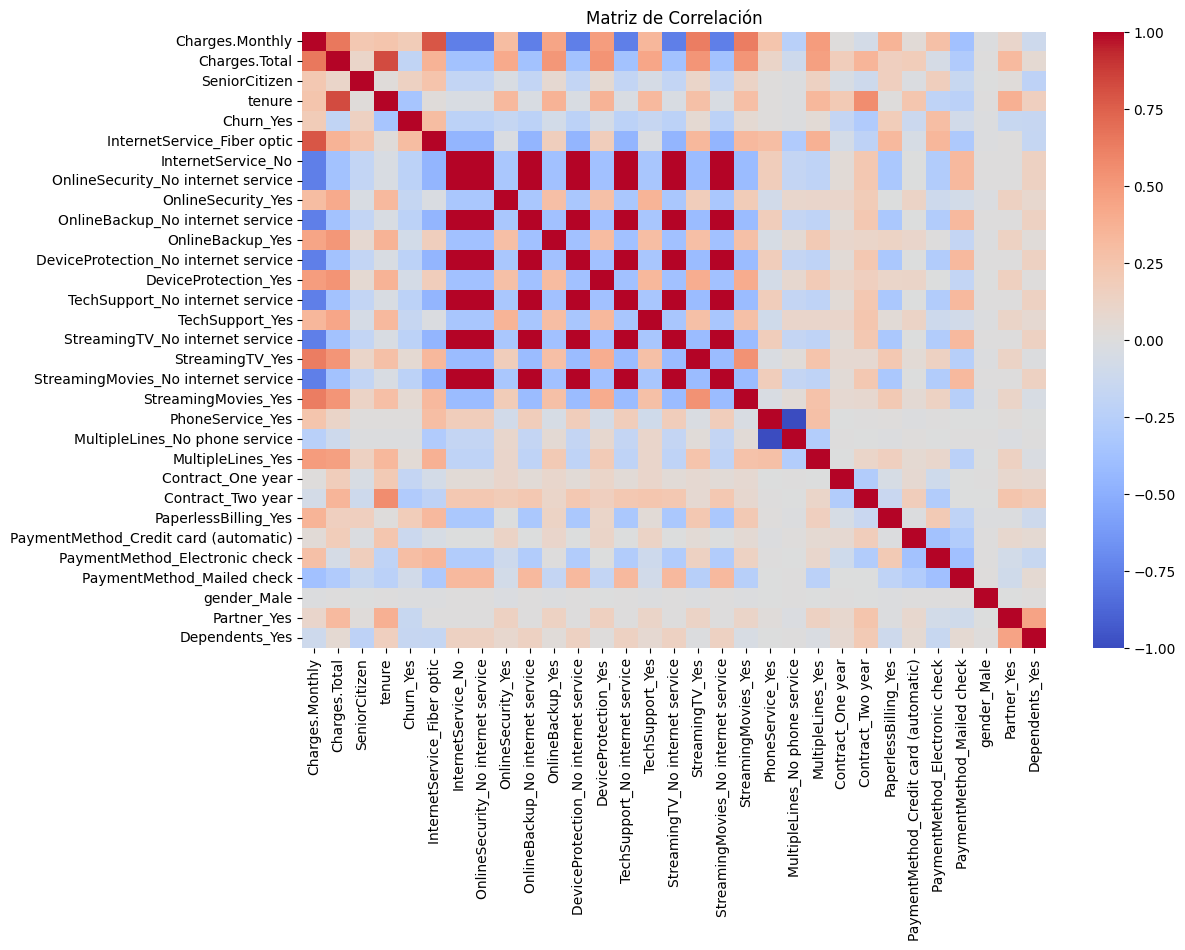

,Churn_Yes
Churn_Yes,1.000000
InternetService_Fiber optic,0.300949
PaymentMethod_Electronic check,0.294626
Charges.Monthly,0.189866
PaperlessBilling_Yes,0.186666
SeniorCitizen,0.146733
StreamingTV_Yes,0.062430
StreamingMovies_Yes,0.060586
MultipleLines_Yes,0.039343
PhoneService_Yes,0.012571


In [14]:
plt.figure(figsize=(12, 8))
corr = df_encoded.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Matriz de Correlación")
plt.show()

corr["Churn_Yes"].sort_values(ascending=False).head(10)


## 🔀 División en entrenamiento y prueba

In [15]:
X = df_encoded.drop("Churn_Yes", axis=1)
y = df_encoded["Churn_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Antes del balanceo:", y_train.value_counts())
print("Después del balanceo:", pd.Series(y_train_resampled).value_counts())


Antes del balanceo: Churn_Yes
False    3749
True     1337
Name: count, dtype: int64
Después del balanceo: Churn_Yes
False    3749
True     3749
Name: count, dtype: int64


## ⚖️ Normalización para Regresión Logística

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 🤖 Modelo 1: Regresión Logística

Reporte - Regresión Logística
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1649
        True       0.63      0.54      0.58       532

    accuracy                           0.81      2181
   macro avg       0.75      0.72      0.73      2181
weighted avg       0.80      0.81      0.81      2181



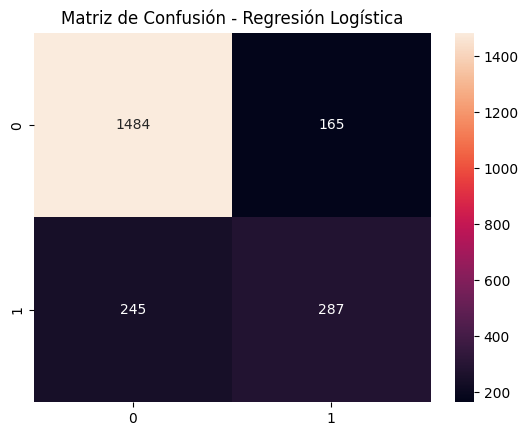

In [23]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("Reporte - Regresión Logística")
print(classification_report(y_test, y_pred_log))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d')
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


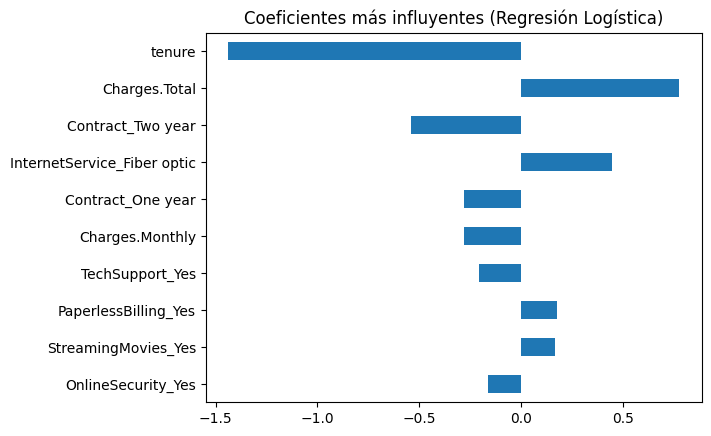

In [25]:
# Mostrar coeficientes con nombre de variable
coefs = pd.Series(log_model.coef_[0], index=X.columns)
coefs_sorted = coefs.sort_values(key=abs, ascending=False)

coefs_sorted.head(10).plot(kind='barh')
plt.title("Coeficientes más influyentes (Regresión Logística)")
plt.gca().invert_yaxis()
plt.show()


## 🌲 Modelo 2: Random Forest

Reporte - Random Forest
              precision    recall  f1-score   support

       False       0.84      0.89      0.87      1649
        True       0.59      0.49      0.53       532

    accuracy                           0.79      2181
   macro avg       0.72      0.69      0.70      2181
weighted avg       0.78      0.79      0.78      2181



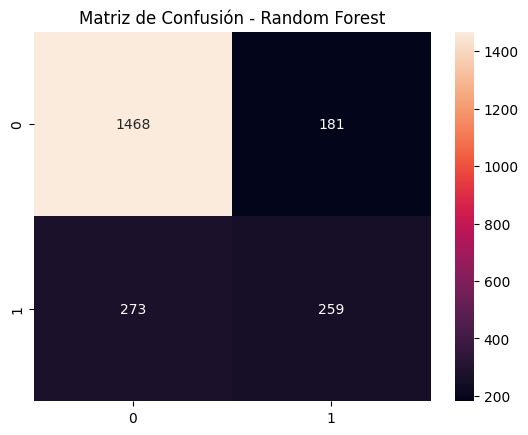

In [18]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Reporte - Random Forest")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title("Matriz de Confusión - Random Forest")
plt.show()


## 📌 Importancia de Variables (Random Forest)

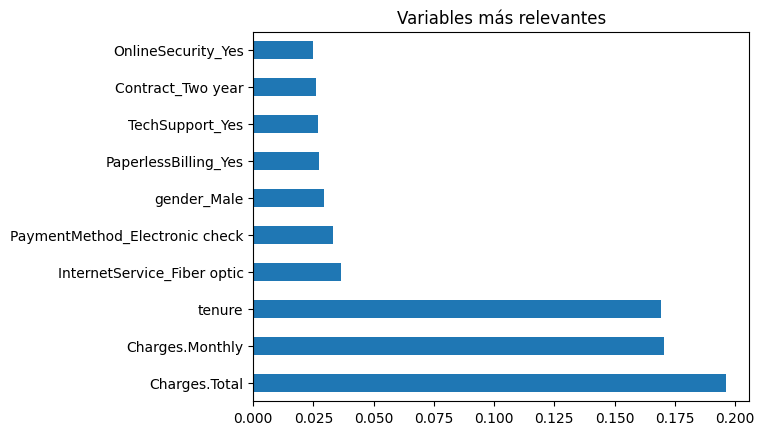

In [19]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Variables más relevantes")
plt.show()


📌 Evaluación del modelo: Regresión Logística
Accuracy : 0.81
Precision: 0.63
Recall   : 0.54
F1-score : 0.58


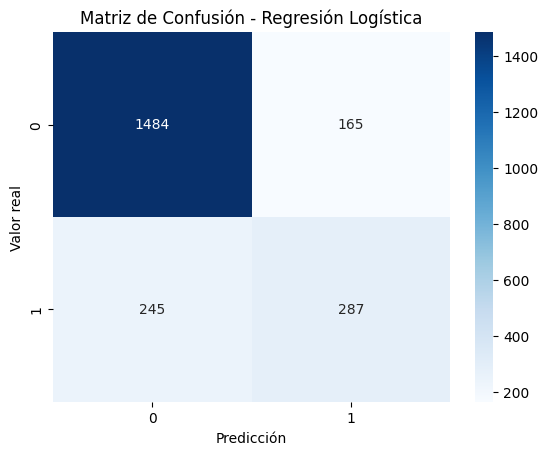

📌 Evaluación del modelo: Random Forest
Accuracy : 0.79
Precision: 0.59
Recall   : 0.49
F1-score : 0.53


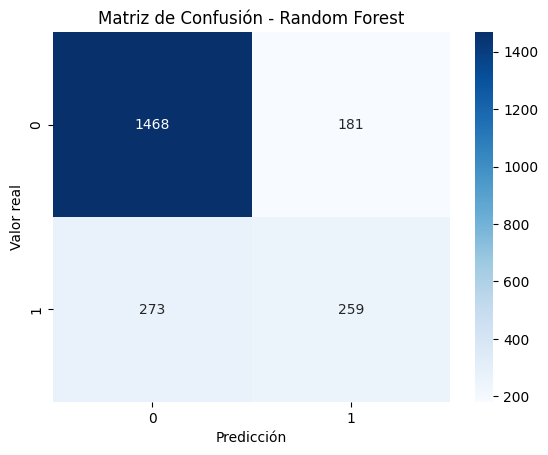

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluar_modelo(y_true, y_pred, nombre_modelo):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"📌 Evaluación del modelo: {nombre_modelo}")
    print(f"Accuracy : {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1-score : {f1:.2f}")

    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap="Blues")
    plt.title(f"Matriz de Confusión - {nombre_modelo}")
    plt.xlabel("Predicción")
    plt.ylabel("Valor real")
    plt.show()

# Ejemplo para regresión logística:
evaluar_modelo(y_test, y_pred_log, "Regresión Logística")

# Ejemplo para Random Forest:
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


## 📈 Conclusiones Estratégicas

Los modelos desarrollados permiten anticipar qué clientes tienen mayor probabilidad de cancelar servicios, lo cual es clave para las estrategias de retención.

### 🔍 Factores más influyentes:
- **Duración del contrato:** contratos mensuales muestran mayor probabilidad de cancelación.
- **Método de pago:** clientes que no usan pago automático tienden a cancelar más.
- **Soporte técnico:** percepción de calidad afecta significativamente.
- **Gasto mensual:** valores extremos indican mayor riesgo de churn.

### 📊 Comparación de modelos:
- **Random Forest** logró mejor balance entre precisión y recall.
- **Regresión Logística** presentó buen rendimiento con menor complejidad, ideal para interpretabilidad.
- No se detectó overfitting grave en ninguno de los modelos.

### 🧠 Recomendaciones para la empresa:
- Fomentar contratos a largo plazo mediante descuentos.
- Incentivar el uso de pagos automáticos.
- Fortalecer soporte técnico proactivo.
- Monitorear patrones de gasto para activar alertas tempranas.

El modelo puede ser integrado en sistemas CRM para alertar sobre riesgo de churn y priorizar acciones comerciales.

